<a href="https://colab.research.google.com/github/kridtapon/5-Lesser-Know-Trend-Indicators/blob/main/5_Lesser_Know_Trend_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf
# Define the stock symbol and time period
symbol = 'SPY'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
import pandas as pd
import numpy as np

def calculate_vpt(data):
    """
    Calculate Volume Price Trend (VPT).
    data: DataFrame with 'Close' and 'Volume'.
    """
    vpt = [0]  # Initialize with 0
    for i in range(1, len(data)):
        change = ((data['Close'][i] - data['Close'][i - 1]) / data['Close'][i - 1]) * data['Volume'][i]
        vpt.append(vpt[-1] + change)
    data['VPT'] = vpt
    return data

def calculate_gapo(data, n):
    """
    Calculate Gopalakrishnan Range Index (GAPO).
    data: DataFrame with 'High' and 'Low'.
    n: Lookback period.
    """
    gapo = []
    for i in range(len(data)):
        if i < n - 1:
            gapo.append(np.nan)
        else:
            high = data['High'][i - n + 1:i + 1].max()
            low = data['Low'][i - n + 1:i + 1].min()
            log_range = np.log10(high / low) if low > 0 else 0
            gapo_value = log_range / np.log10(n)
            gapo.append(gapo_value)
    data['GAPO'] = gapo
    return data

def calculate_trix(data, n):
    """
    Calculate TRIX (Triple Exponential Moving Average).
    data: DataFrame with 'Close'.
    n: Lookback period.
    """
    ema1 = data['Close'].ewm(span=n, adjust=False).mean()
    ema2 = ema1.ewm(span=n, adjust=False).mean()
    ema3 = ema2.ewm(span=n, adjust=False).mean()
    trix = ema3.pct_change() * 100
    data['TRIX'] = trix
    return data

def calculate_vortex(data, n):
    """
    Calculate Vortex Indicator (VI).
    data: DataFrame with 'High', 'Low', and 'Close'.
    n: Lookback period.
    """
    tr = data['High'] - data['Low']
    vm_plus = abs(data['High'] - data['Low'].shift(1))
    vm_minus = abs(data['Low'] - data['High'].shift(1))

    trn = tr.rolling(window=n).sum()
    vip = vm_plus.rolling(window=n).sum() / trn
    vin = vm_minus.rolling(window=n).sum() / trn

    data['VI+'] = vip
    data['VI-'] = vin
    return data

def calculate_stc(data, short_n, long_n, cycle_n):
    """
    Calculate Schaff Trend Cycle (STC).
    data: DataFrame with 'Close'.
    short_n: Short-term EMA period.
    long_n: Long-term EMA period.
    cycle_n: Period for the cycle component.
    """
    macd = data['Close'].ewm(span=short_n, adjust=False).mean() - data['Close'].ewm(span=long_n, adjust=False).mean()
    macd_signal = macd.ewm(span=cycle_n, adjust=False).mean()
    stc = (macd - macd_signal).ewm(span=cycle_n, adjust=False).mean()
    data['STC'] = stc
    return data

# Calculate indicators
df = calculate_vpt(df)
df = calculate_gapo(df, n=5)
df = calculate_trix(df, n=3)
df = calculate_vortex(df, n=5)
df = calculate_stc(df, short_n=12, long_n=26, cycle_n=9)

df

<ipython-input-5-fc6e5d4729ce>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  change = ((data['Close'][i] - data['Close'][i - 1]) / data['Close'][i - 1]) * data['Volume'][i]


,Close,High,Low,Open,Volume,VPT,GAPO,TRIX,VI+,VI-,STC
Date,,,,,,,,,,,
2020-01-02,301.194946,301.213507,299.025478,299.961883,59151200,0.000000e+00,NaN,NaN,NaN,NaN,0.000000
2020-01-03,298.914185,300.054558,297.699654,297.755279,77709700,-5.884472e+05,NaN,-0.094655,NaN,NaN,-0.029111
2020-01-06,300.054535,300.137973,297.013540,297.134071,55653900,-3.761289e+05,NaN,-0.094746,NaN,NaN,-0.054498
2020-01-07,299.210846,299.961814,298.756536,299.479692,40496400,-4.899961e+05,NaN,-0.106208,NaN,NaN,-0.085118
2020-01-08,300.805542,302.038605,299.155262,299.405575,68296000,-1.260007e+05,0.010424,-0.033768,NaN,NaN,-0.093314
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,601.299988,601.340027,595.469971,596.059998,33160100,-7.089391e+07,0.024605,0.097095,0.903487,1.038263,-1.470463
2024-12-26,601.340027,602.479980,598.080017,599.500000,41219100,-7.089117e+07,0.022653,0.243128,1.354982,1.056069,-1.364952
2024-12-27,595.010010,597.780029,590.760010,597.539978,64969300,-7.157507e+07,0.022653,0.132811,1.187960,0.838340,-1.290020


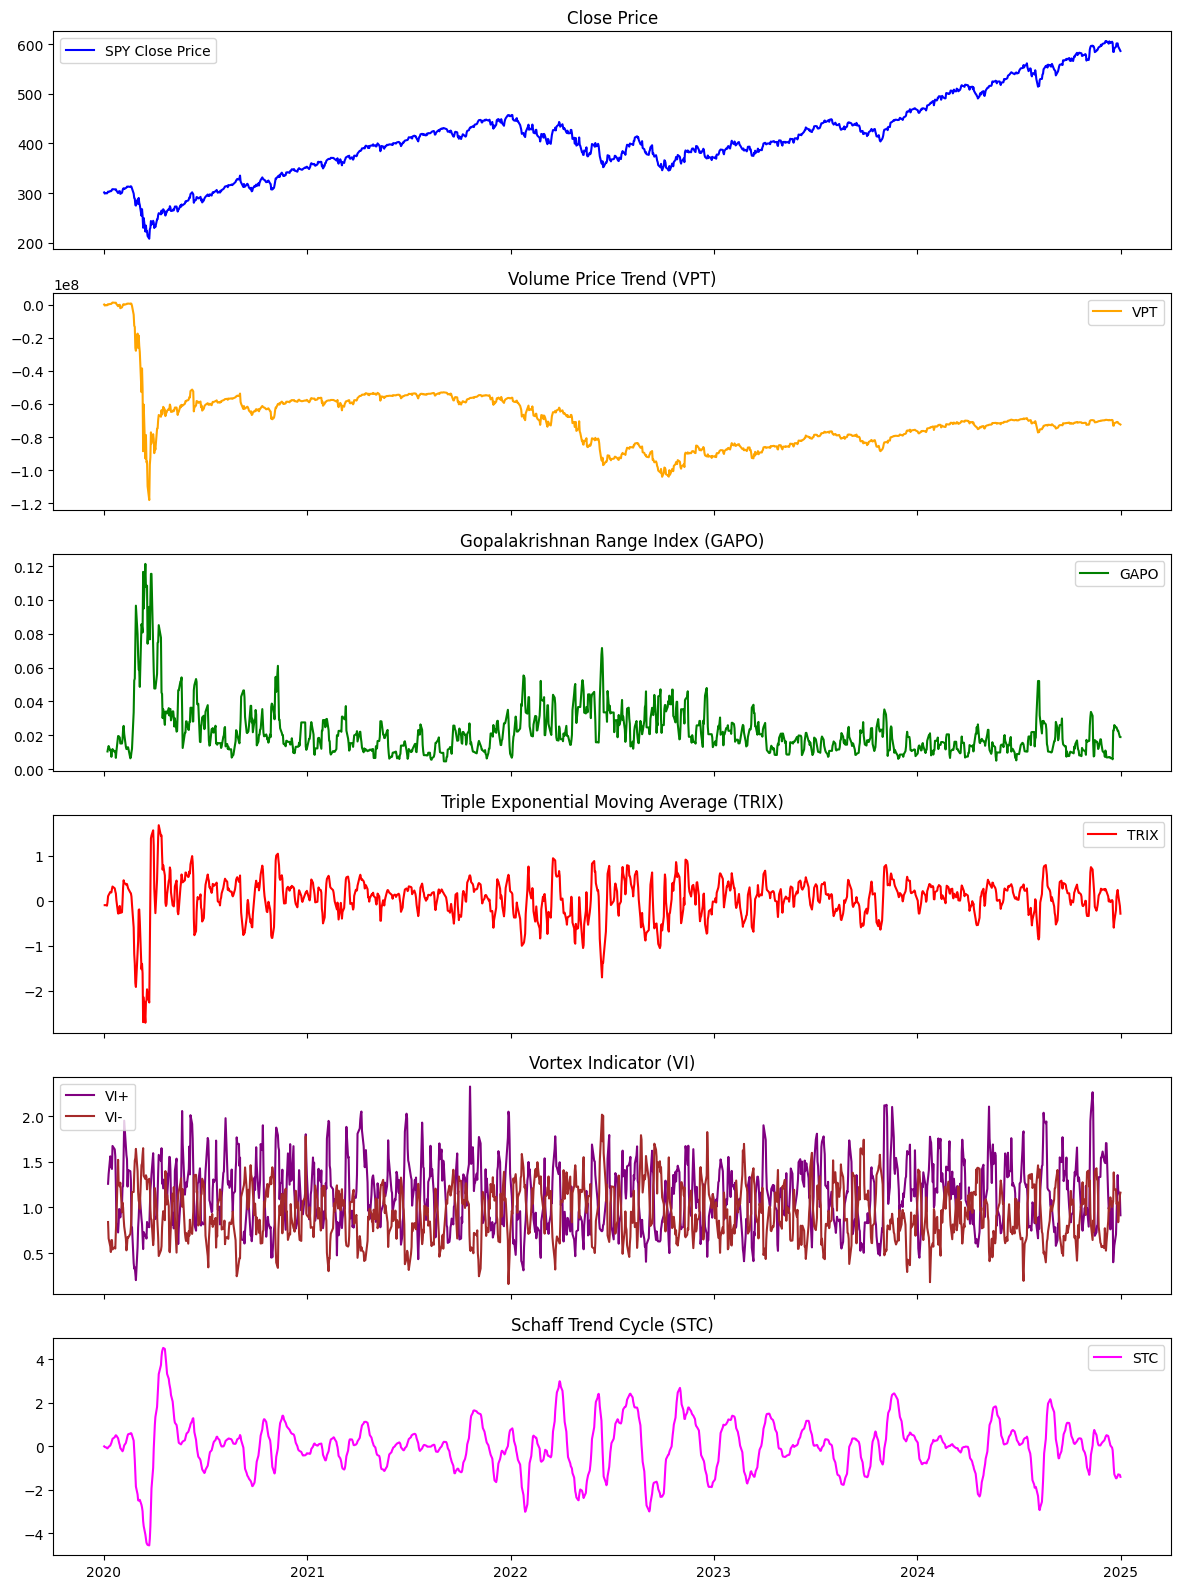

In [7]:
import matplotlib.pyplot as plt

# Example: Assuming `df` is already calculated with the above functions
def plot_indicators(df):
    fig, axes = plt.subplots(6, 1, figsize=(12, 16), sharex=True)

    # Plot close price
    axes[0].plot(df['Close'], label='SPY Close Price', color='blue')
    axes[0].set_title('Close Price')
    axes[0].legend()

    # Plot VPT
    axes[1].plot(df['VPT'], label='VPT', color='orange')
    axes[1].set_title('Volume Price Trend (VPT)')
    axes[1].legend()

    # Plot GAPO
    axes[2].plot(df['GAPO'], label='GAPO', color='green')
    axes[2].set_title('Gopalakrishnan Range Index (GAPO)')
    axes[2].legend()

    # Plot TRIX
    axes[3].plot(df['TRIX'], label='TRIX', color='red')
    axes[3].set_title('Triple Exponential Moving Average (TRIX)')
    axes[3].legend()

    # Plot Vortex Indicator
    axes[4].plot(df['VI+'], label='VI+', color='purple')
    axes[4].plot(df['VI-'], label='VI-', color='brown')
    axes[4].set_title('Vortex Indicator (VI)')
    axes[4].legend()

    # Plot STC
    axes[5].plot(df['STC'], label='STC', color='magenta')
    axes[5].set_title('Schaff Trend Cycle (STC)')
    axes[5].legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the indicators
plot_indicators(df)
